In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [14]:
data=pd.read_csv("spam.csv")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [17]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [19]:
data=data.drop(columns=data.columns[2:5])
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
data.columns=['Category','Message']
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

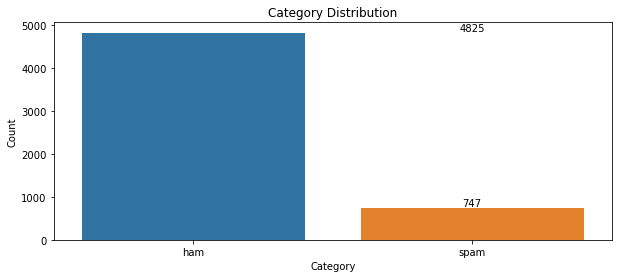

In [22]:
category_counts=data['Category'].value_counts().reset_index()
category_counts.columns=['Category', 'Count']
plt.figure(figsize=(10, 4))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
for i, count in enumerate(category_counts['Count']):
   plt.text(1, count, str(count), ha='center', va='bottom')
plt.show()

In [23]:
data['spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will �_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [24]:
x_train,x_test,y_train,y_test=train_test_split(data.Message,data.spam,test_size=0.3)
from sklearn.feature_extraction.text import CountVectorizer
featurer=CountVectorizer()
x_train_count=featurer.fit_transform(x_train.values)

In [25]:
print(x_train_count)

  (0, 7170)	1
  (0, 3738)	1
  (0, 5001)	1
  (1, 4365)	1
  (1, 5870)	1
  (1, 3596)	1
  (1, 4629)	1
  (1, 4358)	1
  (1, 2397)	1
  (1, 904)	1
  (1, 3115)	2
  (1, 5608)	1
  (1, 4109)	1
  (1, 918)	1
  (1, 1153)	1
  (1, 3484)	1
  (1, 6210)	1
  (2, 6219)	1
  (2, 6411)	1
  (2, 4539)	1
  (2, 2897)	1
  (2, 6451)	1
  (2, 4563)	1
  (2, 2231)	1
  (2, 3864)	2
  :	:
  (3899, 2736)	1
  (3899, 1226)	1
  (3899, 3239)	1
  (3899, 3823)	1
  (3899, 6370)	1
  (3899, 2670)	1
  (3899, 5753)	1
  (3899, 2239)	1
  (3899, 6380)	1
  (3899, 4588)	1
  (3899, 1497)	1
  (3899, 5220)	1
  (3899, 4910)	1
  (3899, 3125)	1
  (3899, 2311)	1
  (3899, 5245)	1
  (3899, 2586)	1
  (3899, 4708)	1
  (3899, 6409)	1
  (3899, 6318)	1
  (3899, 2038)	1
  (3899, 3758)	1
  (3899, 1127)	1
  (3899, 829)	1
  (3899, 6740)	1


In [26]:
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [28]:
x_test_count=featurer.transform(x_test)
model.score(x_test_count,y_test)

0.9814593301435407

In [30]:
#Pre-trained model

pretrained_model=model

new_sentences={"XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL\"\n",
              }
new_sentences_count=featurer.transform(new_sentences)

#Predict whether each sentence is span (1) or not (8)

predictions=pretrained_model.predict(new_sentences_count)

for sentence, prediction in zip(new_sentences, predictions):
   if prediction==1:
       print(f" sentence is a spam message.")
   else:
       print(f" sentence is not a spam message.")

 sentence is a spam message.
